In [1]:
#Welcome to my notebook of Segmenting and Clustering Neighborhoods in Toronto
# Depending where you want to run this notebook you may requiere some libraries
# such as beautifulsoup4.
#!conda install -c conda-forge beautifulsoup4 --yes #uncomment if install needed

In [2]:
from bs4 import BeautifulSoup #library for web scraping
import requests


##  Creating the DataFrame by using BeautifulSoup  

In [3]:
# First I need  obtain the data from Wikipedia
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [4]:
source= requests.get(url).text

In [5]:
soup= BeautifulSoup(source,'lxml')

In [6]:
table=soup.find('table')

In [7]:
import pandas as pd

In [8]:
tables = pd.read_html(source)

In [9]:
#converting in dataframe
df = pd.DataFrame(tables[0])
df.columns=['Postcode','Borough','Neighbourhood']


## Cleaning Data

In [10]:
# We need remove the not assigend from boroughs and grouping them with common postcode
dfa=df[df.Borough != 'Not assigned']
dfb=dfa.groupby("Postcode").agg(lambda x:','.join(set(x)))
dfb=dfb.reset_index()
dfb.head(10)


,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,West Hill,Morningside"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Ionview,Kennedy Park,East Birchmount Park"
7,M1L,Scarborough,"Clairlea,Oakridge,Golden Mile"
8,M1M,Scarborough,"Cliffside,Cliffcrest,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [11]:
dfb.shape

(103, 3)

In [12]:
#conda install -c conda-forge geocoder

In [13]:
#import geocoder # import geocoder
# doesnt work


In [14]:
co_df = pd.read_csv('https://cocl.us/Geospatial_data')
print(co_df.head())
print('shape:',co_df.shape)   # so we have the data of the latitute and longitude

  Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476
shape: (103, 3)


In [15]:
co_df.rename(columns={'Postal Code':'Postcode'}, inplace=True)
co_df.head()# we use the same notation

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [16]:

#sort both dataframes by Postcode 
co_df.sort_values(by = ['Postcode'], inplace=True)


In [17]:
dfb.sort_values(by = ['Postcode'], inplace=True)

In [18]:
#we just merge the data frames
final_df = dfb.merge(co_df, left_on='Postcode', right_on='Postcode', )
final_df.head(12)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,West Hill,Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Ionview,Kennedy Park,East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Oakridge,Golden Mile",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside,Cliffcrest,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


In [19]:
final_df.shape

(103, 5)

In [20]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rusla\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0
  geopy              conda-forge/noarch::geopy-1.20.0-py_0




geopy-1.20.0         | 57 KB     |            |   0% 
geopy-1.20.0         | 57 KB     | ########## | 100% 

geographiclib-1.49   | 32 KB     |            |   0% 
geographiclib-1.49   | 32 KB     | ########## | 100% 
Pre

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


Solving environment: ...working... done

# All requested packages already installed.



WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.


Folium installed
Libraries imported.


In [ ]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [25]:
#we obtain  the longitude and latitude data for Toronto
address = 'Toronto, Canada'
geolocater = Nominatim(user_agent = 'ny_explorer')
location = geolocater.geocode(address)
latitude = location.latitude
longitude = location.longitude 
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [53]:
#create the map
map_city = folium.Map(location=[latitude, longitude], zoom_start=10)

map_city

In [56]:
#Add markers
for lat, lng, borough, neighborhood, in zip(final_df['Latitude'], final_df['Longitude'],
                                           final_df['Borough'], final_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity=0.7,
    parse_html=False).add_to(map_city)
    



In [57]:
map_city

There are many models for clustering out there. I will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, k-means is vastly used for clustering 
I want to identify any patterns


Before we start let's download all the dependencies that we will need.

In [51]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [58]:
DataX = {'x': final_df['Latitude'],
        'y': final_df['Longitude']
       }

In [60]:
from pandas import DataFrame
import matplotlib.pyplot as plt

In [61]:
dfX = DataFrame(DataX,columns=['x','y'])

In [63]:
kmeans = KMeans(n_clusters=4).fit(dfX)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 43.68091501 -79.52204367]
 [ 43.66883403 -79.37416041]
 [ 43.76342274 -79.25682511]
 [ 43.74750405 -79.41179209]]


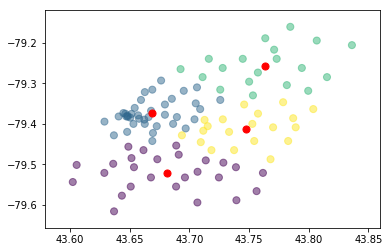

In [65]:
plt.scatter(dfX['x'], dfX['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

Let us increase the number of centroids

In [116]:
kmeans = KMeans(n_clusters=6).fit(dfX)
centroids2 = kmeans.cluster_centers_
print(centroids2)

[[ 43.66394261 -79.39982414]
 [ 43.77480968 -79.2362143 ]
 [ 43.70047379 -79.32087207]
 [ 43.72429525 -79.50506159]
 [ 43.64777637 -79.54037268]
 [ 43.76070544 -79.38981616]]


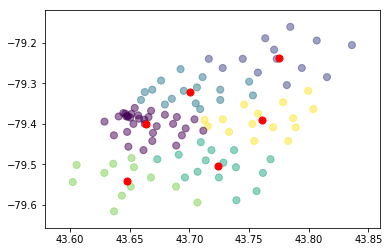

In [117]:
plt.scatter(dfX['x'], dfX['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)

I am going to visualize the restaurants around one centroid 

In [113]:
[centroids[1, 0], centroids[1, 1]]

[43.668834031578946, -79.3741604131579]

In [118]:
[centroids2[1, 0], centroids2[1, 1]]

[43.77480967692308, -79.2362143]

In [89]:
search_query = 'Restaurant'
radius = 99210500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [90]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VV415VZUJXDXFEELDKJ45UIUKUEY1R2X3MUUEO5PBVHCQ5XB&client_secret=RPJJV01CL5EG31FBDK1FTWD4BMCJZVXVR0LWIWD03QQBI3N0&ll=43.653963,-79.387207&v=20180604&query=Restaurant&radius=99210500&limit=30'

In [91]:
results = requests.get(url).json()

In [92]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",False,4ad4c05ff964a52048f720e3,110 Chestnut Street,CA,Toronto,Canada,NaN,145,"[110 Chestnut Street, Toronto ON M5G 1R3, Canada]","[{'label': 'display', 'lat': 43.65488413420439...",43.654884,-79.385931,NaN,M5G 1R3,ON,Hemispheres Restaurant & Bistro,v-1562602910,NaN
1,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",False,4ad4c060f964a5207ff720e3,323 Spadina Ave.,CA,Toronto,Canada,at D'Arcy St.,922,"[323 Spadina Ave. (at D'Arcy St.), Toronto ON ...","[{'label': 'display', 'lat': 43.65431754076345...",43.654318,-79.398650,Kensington Market,M5T 2E9,ON,Rol San Restaurant 龍笙棧,v-1562602910,NaN
2,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",False,4b223f5af964a520ba4424e3,225 Frnt St W,CA,Toronto,Canada,NaN,1039,"[225 Frnt St W, Toronto ON M5V 2X3, Canada]","[{'label': 'display', 'lat': 43.64474919591934...",43.644749,-79.385113,Entertainment District,M5V 2X3,ON,Azure Restaurant & Bar,v-1562602910,136175835
3,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",False,4b072e9df964a52009f922e3,280 Spadina Ave.,CA,Toronto,Canada,at Dundas St. W.,892,"[280 Spadina Ave. (at Dundas St. W.), Toronto ...","[{'label': 'display', 'lat': 43.65278331265585...",43.652783,-79.398174,NaN,NaN,ON,Sky Dragon Chinese Restaurant 龍翔酒樓,v-1562602910,NaN
4,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...",False,4b266f05f964a520657b24e3,266 Spadina Ave,CA,Toronto,Canada,at Willison Sq,892,"[266 Spadina Ave (at Willison Sq), Toronto ON ...","[{'label': 'display', 'lat': 43.6522783893466,...",43.652278,-79.398039,NaN,M5T 2E4,ON,Goldstone Noodle Restaurant 金石,v-1562602910,NaN


In [93]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

#dataframe_filtered

#### Let's visualize the Italian restaurants that are nearby

In [94]:
dataframe_filtered.name

0                    Hemispheres Restaurant & Bistro
1                             Rol San Restaurant 龍笙棧
2                             Azure Restaurant & Bar
3                 Sky Dragon Chinese Restaurant 龍翔酒樓
4                     Goldstone Noodle Restaurant 金石
5                                     360 Restaurant
6                            Swatow Restaurant 汕頭小食家
7                       Aroma Fine Indian Restaurant
8                     The Hot House Restaurant & Bar
9                      Green Tea Restaurant Downtown
10                             Victoria's Restaurant
11                           Victor Restaurant & Bar
12    Sassafraz | Cafe | Restaurant | Private Events
13               Richtree Natural Market Restaurants
14                          New Sky Restaurant 小沙田食家
15                             ONE Restaurant/Lounge
16                     Hong Shing Chinese Restaurant
17           Tasty's Caribbean Restaurant & Catering
18                North-East Chinese Restauran

In [128]:
venues_map = folium.Map(location=[centroids2[0, 0], centroids2[0, 1]], zoom_start=13) # generate map centred around one centrodid

# add a red circle marker to represent the centroid with k=4
folium.features.CircleMarker(
    [centroids[1, 0], centroids[1, 1]],
    radius=10,
    color='red',
    popup='Centroid 1',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add a red circle marker to represent the centroid with k=6
folium.features.CircleMarker(
    [centroids2[0, 0], centroids2[0, 1]],
    radius=10,
    color='Black',
    popup='Centroid 2',
    fill = True,
    fill_color = 'Black',
    fill_opacity = 0.6
).add_to(venues_map)


# add the restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## That means that the centroid  k=6  in black is closer to the  restaurants spots than centroid with k=4

## And just for curosity this centroid is exacly over the University of Toronto )))